# imports

In [1]:
from trotter.hamsimtrotter import AlgorithmHamSimTrotter
from qDrift.hamsimqDrift import AlgorithmHamSimqDrift
from pytket.pauli import Pauli, QubitPauliString
from pytket.utils import QubitPauliOperator
from pytket.circuit import Circuit,Qubit,fresh_symbol

from utils.func import calculate_error

from tqdm import tqdm
import numpy as np

# system parameters

In [2]:
def gen_sys_param(n=3):
    global t_max
    global n_qdrift_steps
    global n_lcu_steps
    global precision
    global initial_state_circ
    global t
    global hamiltonian
    global hamiltonian_drift
    global coeff
    global measurements
    global hamiltonian_test
    global h_test
    global coeff_test
    global n_perm_steps
    global Heisenberg
    global H
    global H3

    t_max=n
    n_qdrift_steps = 3
    n_lcu_steps = 3
    n_perm_steps = 3
    precision = 10**(-5)
    initial_state_circ = Circuit(n)
    initial_state_circ.H(0)
    initial_state_circ.H(1)
    initial_state_circ.H(2)
    # initial_state_circ.H(3)
    # initial_state_circ.H(4)
    t = fresh_symbol("t")

    hamiltonian = QubitPauliOperator(
        {
            QubitPauliString([Qubit(0)], [Pauli.Z]): 0.1*t,
            QubitPauliString(
                [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
                [Pauli.Y, Pauli.Z, Pauli.X, Pauli.X],
            ): 0.4*t,
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): 0.2*t,
        }
    )
    H = [   QubitPauliOperator({QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
                                QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t})]
    
    H3 = QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(0)], [Pauli.X, Pauli.X]): t,
            
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t
        })

    Heisenberg = [
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(0)], [Pauli.X, Pauli.X]): t,
            
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(0)], [Pauli.X, Pauli.X]): t,
            
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(5), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(5), Qubit(0)], [Pauli.X, Pauli.X]): t,
            
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(5), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t,
            QubitPauliString([Qubit(5)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(6), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(6), Qubit(0)], [Pauli.X, Pauli.X]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(6), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t,
            QubitPauliString([Qubit(5)],[Pauli.Z]): t,
            QubitPauliString([Qubit(6)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(7), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(7), Qubit(0)], [Pauli.X, Pauli.X]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(7), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t,
            QubitPauliString([Qubit(5)],[Pauli.Z]): t,
            QubitPauliString([Qubit(6)],[Pauli.Z]): t,
            QubitPauliString([Qubit(7)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(8), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(8), Qubit(0)], [Pauli.X, Pauli.X]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(8), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t,
            QubitPauliString([Qubit(5)],[Pauli.Z]): t,
            QubitPauliString([Qubit(6)],[Pauli.Z]): t,
            QubitPauliString([Qubit(7)],[Pauli.Z]): t,
            QubitPauliString([Qubit(8)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(8), Qubit(9)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(9), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(8), Qubit(9)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(9), Qubit(0)], [Pauli.X, Pauli.X]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(8), Qubit(9)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(9), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t,
            QubitPauliString([Qubit(5)],[Pauli.Z]): t,
            QubitPauliString([Qubit(6)],[Pauli.Z]): t,
            QubitPauliString([Qubit(7)],[Pauli.Z]): t,
            QubitPauliString([Qubit(8)],[Pauli.Z]): t,
            QubitPauliString([Qubit(9)],[Pauli.Z]): t 
        }) 
    ]

    hamiltonian_test = QubitPauliOperator(
        {
            # QubitPauliString(
            #     [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
            #     [Pauli.Y, Pauli.Z, Pauli.X, Pauli.X],
            # ): 0.4*t,
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.X]): 0.2*t
        }
    )

    hamiltonian_drift = ['ZIII','YZXX','XXII']
    h_test = ['ZXII']
    coeff_test = [0.2]
    coeff = [0.1,0.4,0.2]

    measurements = [QubitPauliOperator({QubitPauliString([Qubit(i)], [Pauli.Z]): 1}) for i in range(initial_state_circ.n_qubits)]

In [3]:
gen_sys_param()
error = 1
n_trotter_steps = 2

gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,H3,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.lie_trotter()

[[ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
   0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j
   0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j]
 [ 0.35355339+0.j  0.35355339+0.j -0.35355339+0.j -0.35355339+0.j
   0.35355339+0.j  0.35355339+0.j -0.35355339+0.j -0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j -0.35355339+0.j  0.35355339+0.j
   0.35355339+0.j -0.35355339+0.j -0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
  -0.35355339+0.j -0.35355339+0.j -0.35355339+0.j -0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j
  -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j  0.35355339+0.j -0.35355339+0.j -0.35355339+0.j
  -0.35355339+0.j -0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j -0.35355339+0.j  0.35355339+0.j
  -

# Trotter cheat

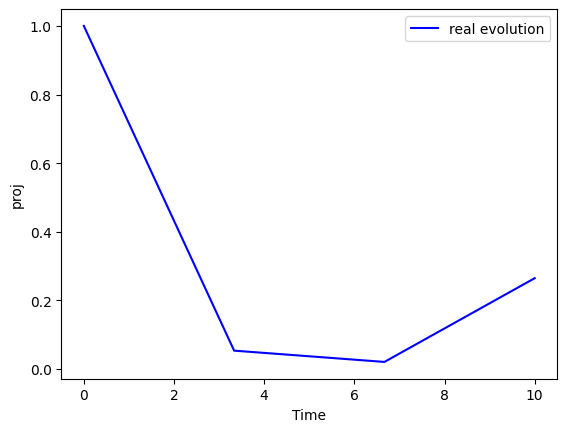

In [25]:
gen_sys_param(7)
n_trotter_steps = 3
trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[3],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_cheat.execute(labels='real evolution')

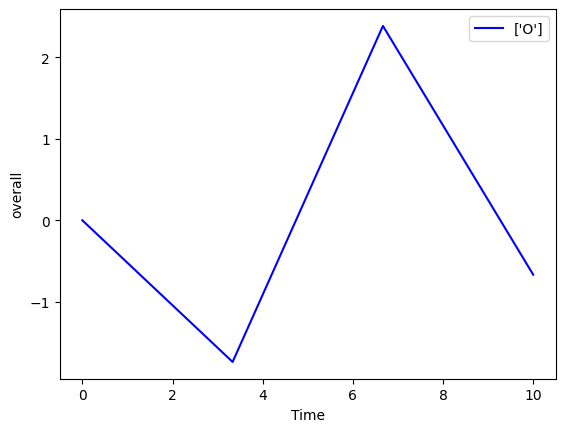

In [6]:
gen_sys_param()
trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_cheat.execute(exps='overall',labels=['O'])

# Lie-Trotter

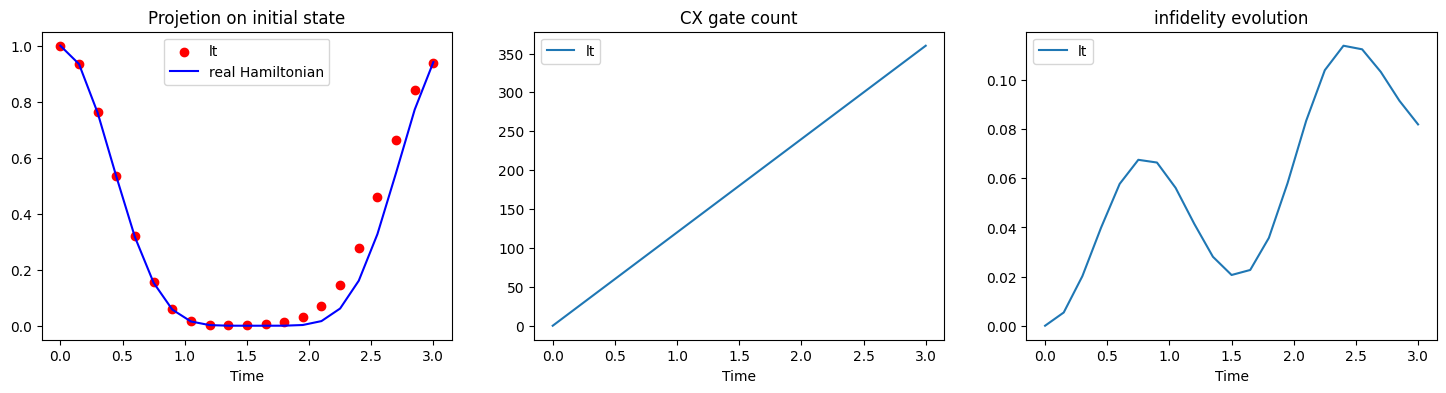

In [7]:
n_trotter_steps = 20
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,H3,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(labels=['lt','lt','lt'],cheat=False,color='red')

/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


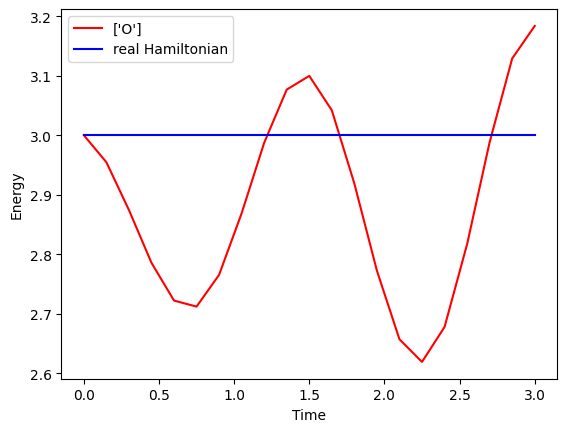

In [16]:
n_trotter_steps = 20
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='Energy',labels=['O'],cheat=False,color='red')

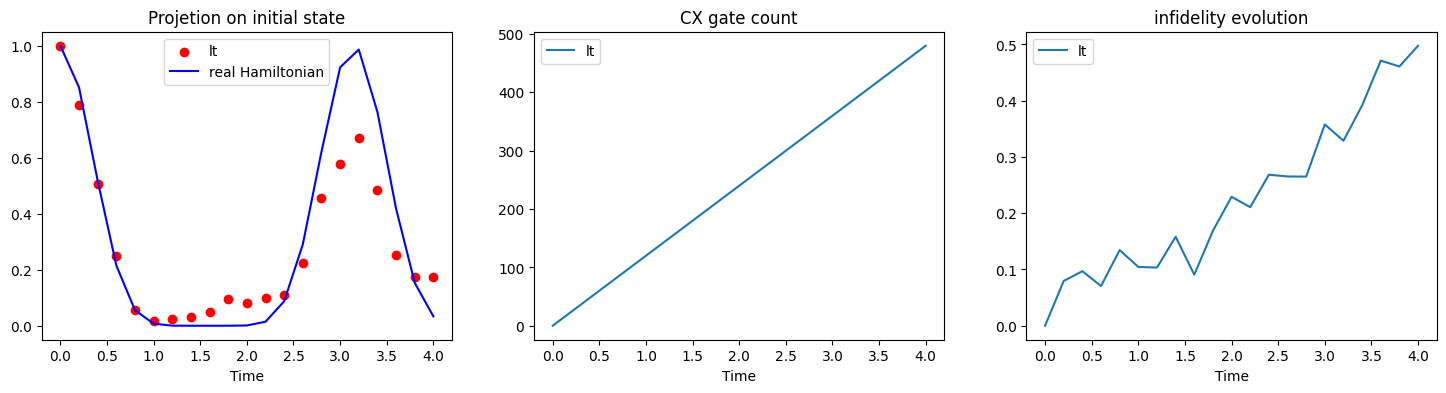

In [5]:
n_trotter_steps = 20
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(labels=['lt','lt','lt'],cheat=False,color='red')

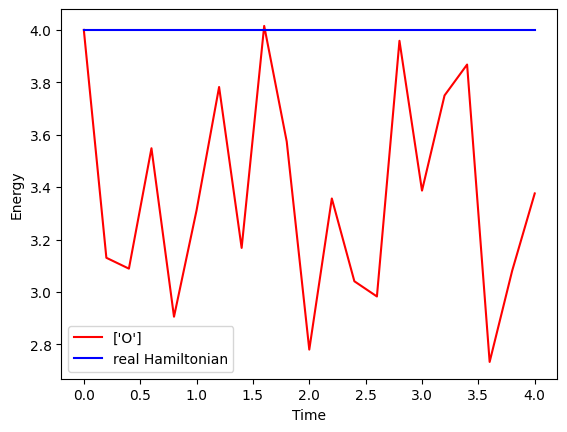

In [19]:
n_trotter_steps = 20
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='Energy',labels=['O'],cheat=False,color='red')

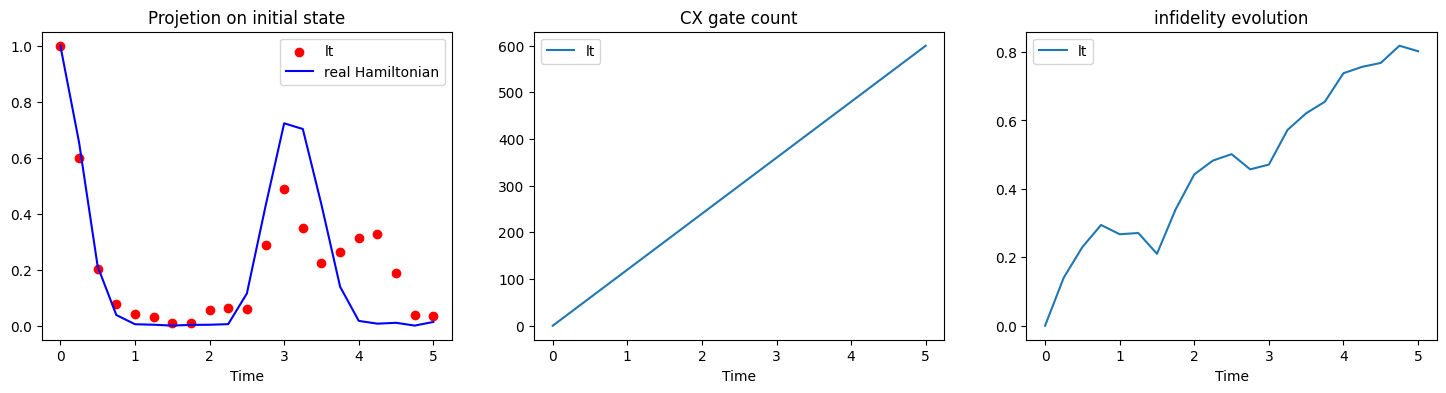

In [3]:
n_trotter_steps = 20
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[1],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(labels=['lt','lt','lt'],cheat=False,color='red')

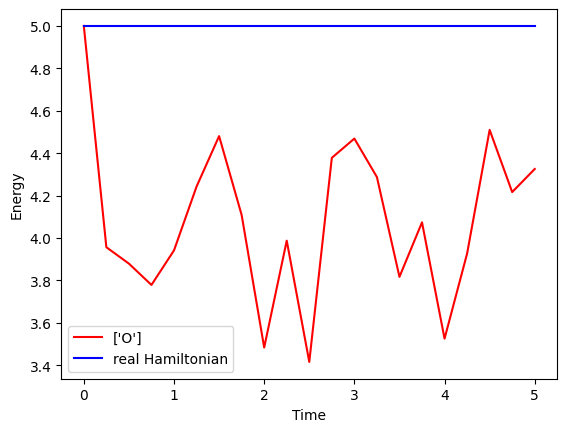

In [21]:
n_trotter_steps = 20
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[1],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='Energy',labels=['O'],cheat=False,color='red')

/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


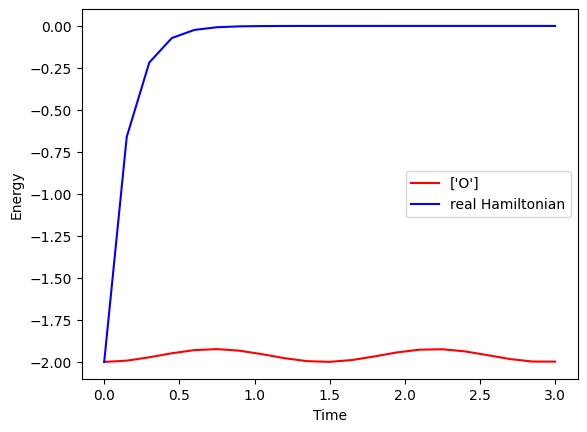

In [3]:
n_trotter_steps = 20
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='Energy',labels=['O'],cheat=False,color='red')

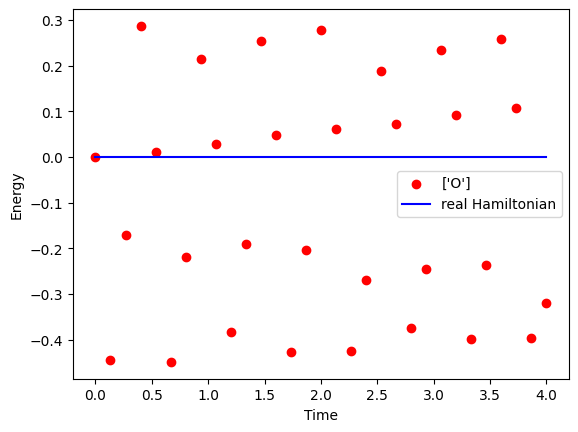

In [4]:
n_trotter_steps = 30
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='Energy',labels=['O'],cheat=False,color='red')

ValueError: x and y must have same first dimension, but have shapes (16,) and (0,)

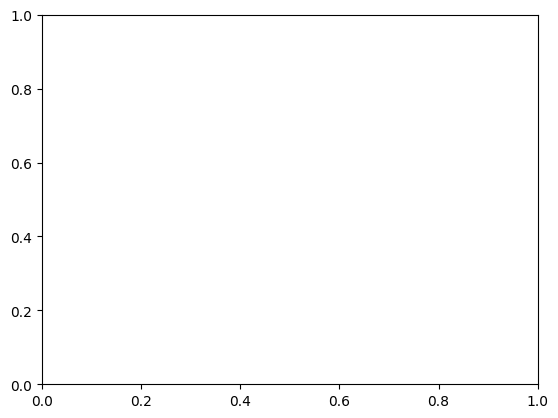

In [9]:
import matplotlib.pyplot as plt
plt.plot(trotter_time_evolution._time_space, list(trotter_time_evolution.E.values()))

In [ ]:
error = 1
n_trotter_steps = 3
while error > precision:
    U_sims = []
    for i in tqdm(range(3)):
        gen_sys_param(4)
        trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
        trotter_time_evolution.lie_trotter()
        U_sim, U = trotter_time_evolution.execute(labels=['LieTrotter','LieTrotter','LieTrotter'], color='red', cheat=False, plot=False)
        U_sims.append(U_sim)
    error = calculate_error(U_sims, U)
    print('step:',n_trotter_steps,'error:',error)
    n_trotter_steps += 1

/usr/local/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


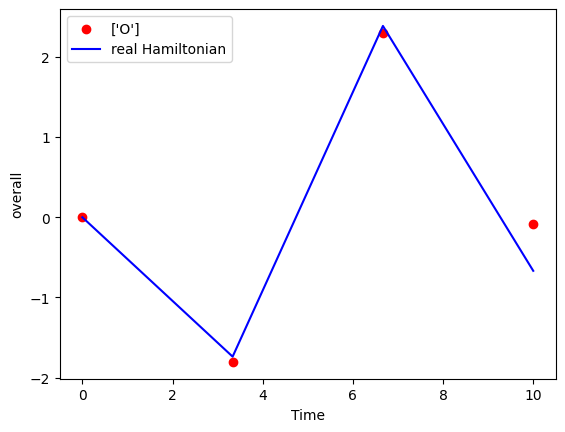

In [8]:
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='overall',labels=['O'],cheat=False,color='red')

# second order trotter

In [3]:
n_trotter_steps = 2
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,H3,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
# trotter_time_evolution2.execute(exps='Energy',labels=['O'],cheat=False,color='yellow')

     ┌───┐┌───┐┌─────────┐┌───┐                     ┌───┐┌─────────┐     ┌───┐»
q_0: ┤ H ├┤ X ├┤ Rz(1.5) ├┤ X ├─────────────────────┤ X ├┤ Rz(1.5) ├─────┤ X ├»
     ├───┤└─┬─┘└─────────┘└─┬─┘┌───┐┌─────────┐┌───┐└─┬─┘├─────────┤┌───┐└─┬─┘»
q_1: ┤ H ├──■───────────────■──┤ X ├┤ Rz(1.5) ├┤ X ├──┼──┤ Rz(1.5) ├┤ H ├──┼──»
     ├───┤                     └─┬─┘└─────────┘└─┬─┘  │  └─────────┘└───┘  │  »
q_2: ┤ H ├───────────────────────■───────────────■────■────────────────────■──»
     └───┘                                                                    »
«     ┌─────────┐┌───┐┌───┐┌─────────┐┌───┐┌───┐┌───┐                          »
«q_0: ┤ Rz(1.5) ├┤ H ├┤ X ├┤ Rz(1.5) ├┤ X ├┤ H ├┤ H ├──────────────────────────»
«     └─────────┘└───┘└─┬─┘└─────────┘└─┬─┘├───┤├───┤┌───┐┌─────────┐┌───┐┌───┐»
«q_1: ──────────────────■───────────────■──┤ H ├┤ H ├┤ X ├┤ Rz(1.5) ├┤ X ├┤ H ├»
«     ┌─────────┐┌───┐                     └───┘└───┘└─┬─┘└─────────┘└─┬─┘├───┤»
«q_2: ┤ Rz(1.5) ├┤ H ├─────────────

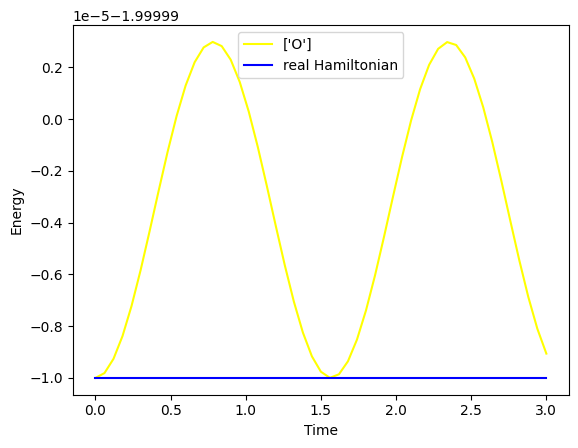

In [11]:
n_trotter_steps = 50
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(exps='Energy',labels=['O'],cheat=False,color='yellow')

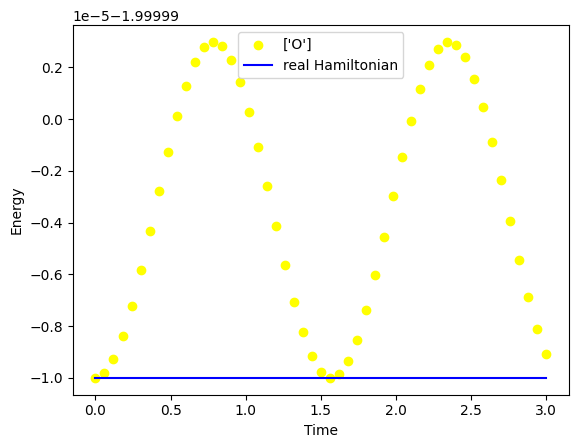

In [15]:
n_trotter_steps = 50
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(exps='Energy',labels=['O'],cheat=False,color='yellow')

/usr/local/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


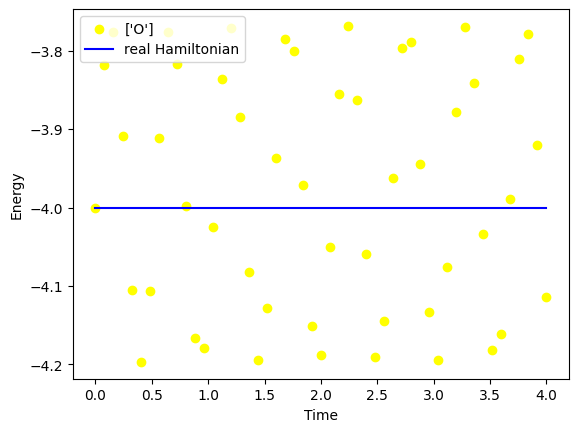

In [5]:
n_trotter_steps = 50
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(exps='Energy',labels=['O'],cheat=False,color='yellow')

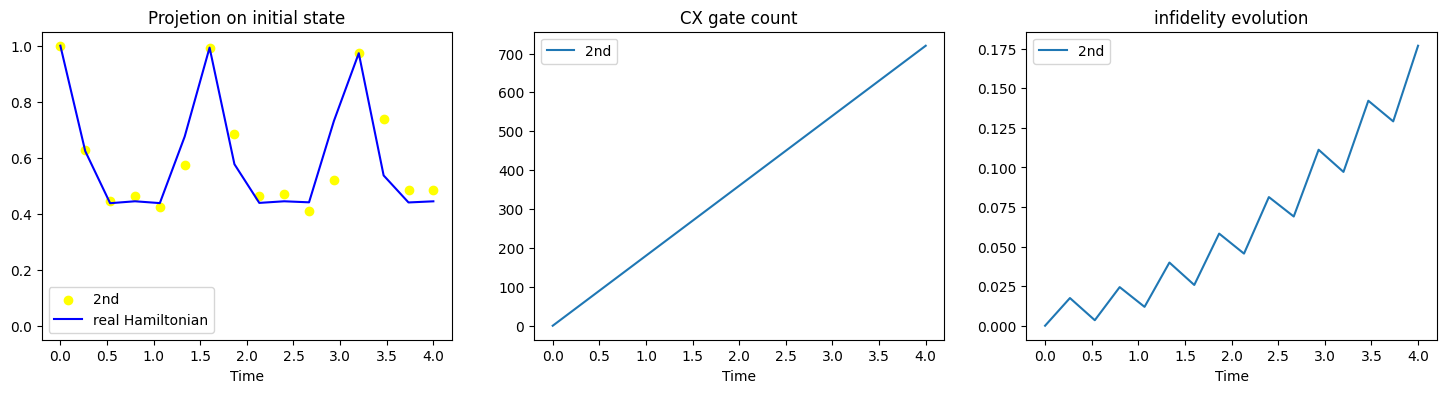

In [4]:
gen_sys_param(4)
n_trotter_steps = 15
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(labels=['2nd','2nd','2nd'], cheat=False, color='yellow')

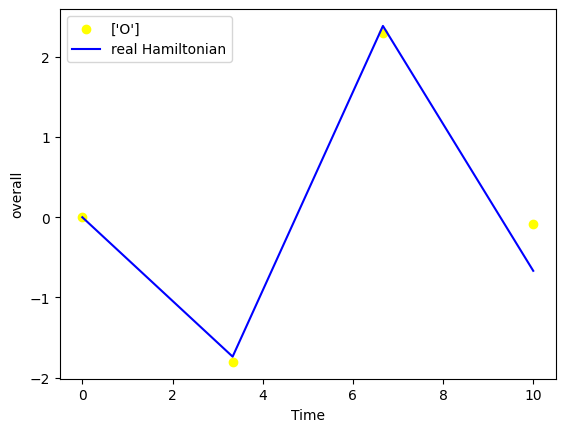

In [10]:
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(exps='overall',labels=['O'],cheat=False,color='yellow')

# higher order trotter

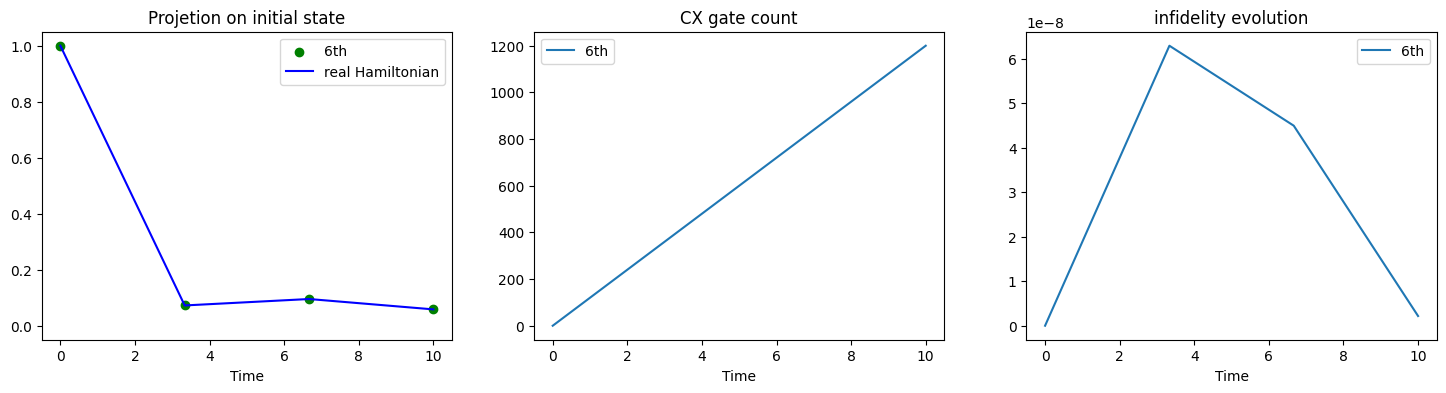

In [11]:
gen_sys_param()
trotter_time_evolution_high = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
# from pytket.extensions.qiskit import tk_to_qiskit
# print(tk_to_qiskit(trotter_time_evolution_high.suzuki_trotter_cir_gen(order=6)))
trotter_time_evolution_high.suzuki_trotter(6)
trotter_time_evolution_high.execute(labels=['6th','6th','6th'], cheat=False, color='green')

# Compare

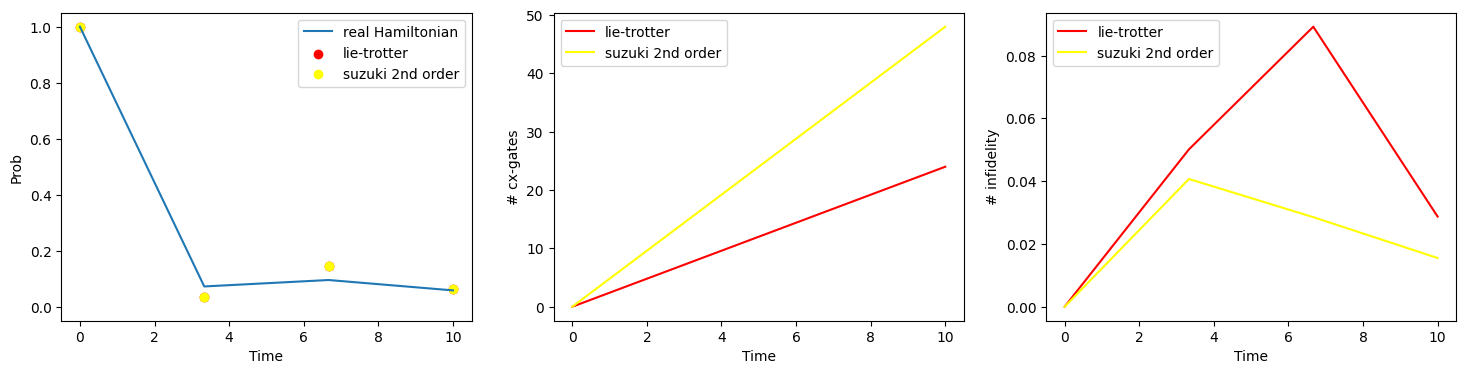

In [12]:
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
expsl, gatesl, infidelitiesl, _ = trotter_time_evolution.lie_trotter(True)
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
expss, gatess, infidelitiess, _ = trotter_time_evolution.second_order_suzuki_trotter(True)

trotter_time_evolution.compare([expsl,expss], [gatesl,gatess], [infidelitiesl, infidelitiess], ['lie-trotter', 'suzuki 2nd order'], ['red','yellow'])

# TODO set gate comparison on the scale of same infidelity threshold value

# qDrift

['YZXX', 'YZXX', 'XXII'] [1.4854461355243564, 1.4854461355243564, 1.4854461355243564] [1 1 2]
['YZXX', 'ZIII', 'YZXX'] [1.4854461355243564, 1.4854461355243564, 1.4854461355243564] [1 0 1]
['YZXX', 'YZXX', 'YZXX'] [1.4854461355243564, 1.4854461355243564, 1.4854461355243564] [1 1 1]


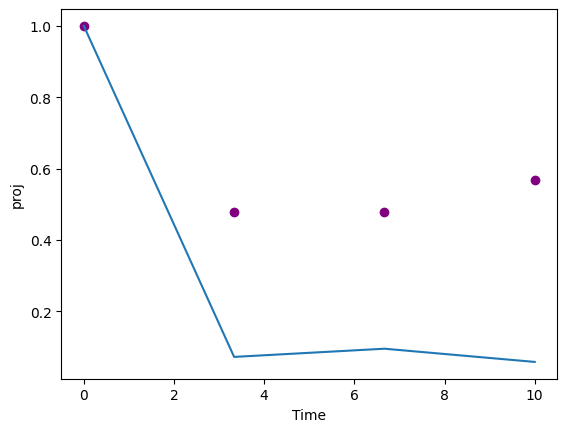

In [13]:
gen_sys_param()
drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,hamiltonian_drift,coeff,measurements,t_max,n_qdrift_steps,precision)
drift_time_evolution.Drift_exp()
trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_cheat._trotter_step_cheat(exps='proj')
drift_time_evolution.execute(list(trotter_time_evolution_cheat._real_measurement.values()), color='purple')

# LCU

100%|██████████| 3/3 [00:09<00:00,  3.04s/it]


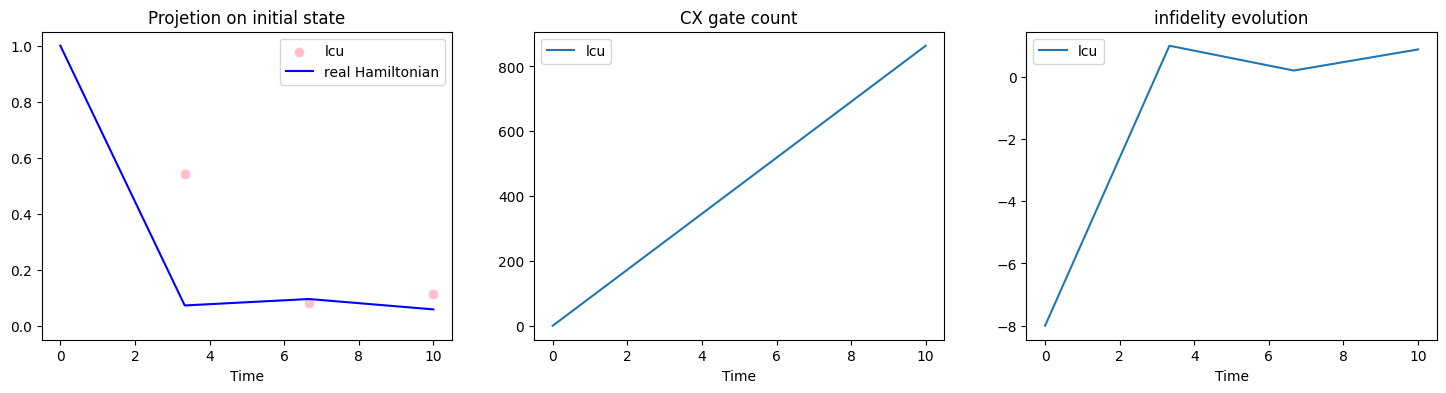

In [3]:
gen_sys_param()
lcu_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_lcu_steps,t)
lcu_time_evolution.LCU(2)
lcu_time_evolution.execute(labels=['lcu','lcu','lcu'], cheat=False, color='pink')

# Random Perm

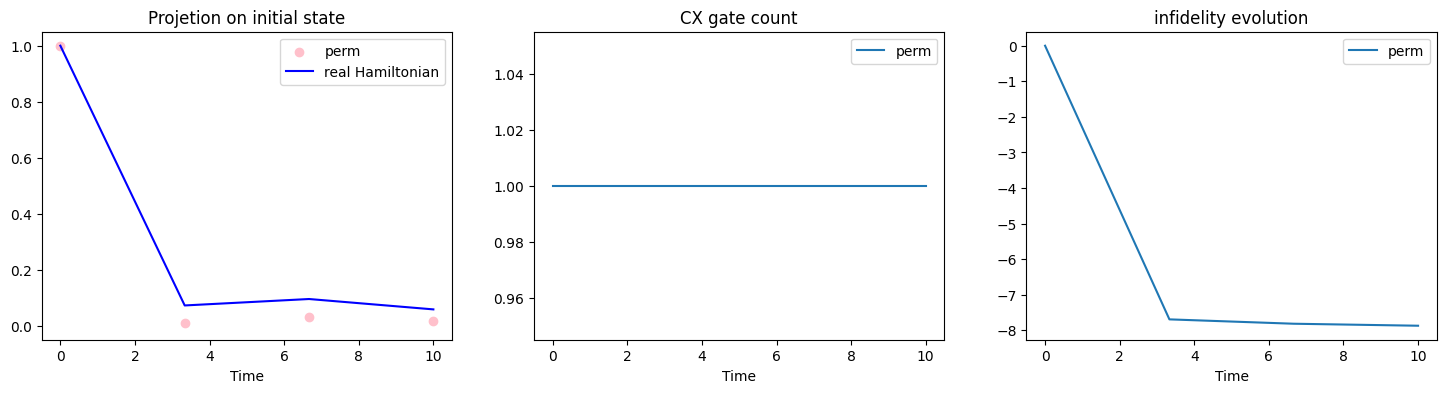

In [3]:
gen_sys_param()
perm_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_lcu_steps,t)
perm_time_evolution.random_perm(2)
perm_time_evolution.execute(labels=['perm','perm','perm'], cheat=False, color='pink')